In [1]:
import spikeinterface as si
import spikeinterface.extractors as se 
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.widgets as sw
from spikeinterface import WaveformExtractor


import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
import shutil
from sklearn.decomposition import PCA
import pandas as pd
import pprint
import seaborn as sns
sns.set_style("whitegrid")

import probeinterface as pi
from probeinterface.plotting import plot_probe

from spikeinterface.comparison import MultiSortingComparison

from utils import *

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size'] = '5'

In [2]:
ss.installed_sorters()

RUNNING SHELL SCRIPT: /nvme/imbeni/1001177/tmp_shellscript6gh837yo/script.sh
RUNNING SHELL SCRIPT: /nvme/imbeni/1001177/tmp_shellscriptl6izvbrw/script.sh
RUNNING SHELL SCRIPT: /nvme/imbeni/1001177/tmp_shellscriptiajdsk07/script.sh
RUNNING SHELL SCRIPT: /nvme/imbeni/1001177/tmp_shellscriptb_uvslll/script.sh
RUNNING SHELL SCRIPT: /nvme/imbeni/1001177/tmp_shellscriptaqvkctp4/script.sh
RUNNING SHELL SCRIPT: /nvme/imbeni/1001177/tmp_shellscripthi4pnubq/script.sh
RUNNING SHELL SCRIPT: /nvme/imbeni/1001177/tmp_shellscript4bi9kvyc/script.sh
RUNNING SHELL SCRIPT: /nvme/imbeni/1001177/tmp_shellscriptow5pqzgp/script.sh


['herdingspikes', 'spykingcircus2', 'tridesclous2']

In [3]:
datapath = '../../../scratch/imbeni/sorting/dataset/reyes/Exp26/'
outpath = '../../../scratch/imbeni/sorting/output/2_reyes/Exp26/'
filename = 'S001E026F005_Raw.raw'
name = filename[:-8]
out = outpath + name
outrec = out + '_rec'



In [4]:
rec = si.load_extractor(outrec)

In [5]:
sorters = check_available_sorter_results(out)
print(sorters)

['hdsort', 'herdingspikes', 'kilosort3', 'spykingcircus2', 'tridesclous2']


In [6]:
metadata_txt = '../../../scratch/imbeni/sorting/dataset/reyes/spk_mat_files/8Shanks/S001E026G001/S001E026G001_layer_depth_barrels.txt'

In [7]:
mapping_multi_raw = np.array([137,129,121,84,18,26,34,42,
                88,96,104,112,46,56,64,72,
                91,99,107,85,51,59,67,75,
                138,130,122,114,47,25,33,41,
                136,128,120,82,19,27,35,43,
                89,97,105,113,48,57,65,73,
                90,98,106,83,50,58,66,74,
                139,131,123,115,49,24,32,40,
                135,127,119,142,20,28,36,44,
                86,94,102,110,79,54,62,70,
                93,101,109,143,53,61,69,77,
                140,132,124,116,78,23,31,39,
                134,126,118,144,21,29,37,45,
                87,95,103,111,81,55,63,71,
                92,100,108,145,52,60,68,76,
                141,133,125,117,80,22,30,38])
layers_map = np.array(pd.read_csv(metadata_txt, skiprows= 3, nrows=16, index_col=False, header=None))

In [8]:
layers_map = layers_map.astype(str)
layers_map[layers_map == '2'] = '2/3'
layers_map[layers_map == '5'] = '5A'
layers_map[layers_map == '6'] = '5B'
print(layers_map)

[['2/3' '2/3' '2/3' '2/3' '2/3' '2/3' '2/3' '2/3']
 ['2/3' '2/3' '2/3' '2/3' '2/3' '2/3' '2/3' '2/3']
 ['2/3' '2/3' '2/3' '2/3' '2/3' '2/3' '2/3' '2/3']
 ['4' '4' '4' '4' '4' '4' '4' '4']
 ['4' '4' '4' '4' '4' '4' '4' '4']
 ['4' '4' '4' '4' '4' '4' '4' '4']
 ['4' '4' '4' '4' '4' '4' '4' '4']
 ['5A' '5A' '5A' '5A' '5A' '5A' '5A' '5A']
 ['5A' '5A' '5A' '5A' '5A' '5A' '5A' '5A']
 ['5A' '5A' '5A' '5A' '5A' '5A' '5A' '5A']
 ['5A' '5A' '5A' '5A' '5A' '5A' '5A' '5A']
 ['5B' '5B' '5B' '5B' '5B' '5B' '5B' '5B']
 ['5B' '5B' '5B' '5B' '5B' '5B' '5B' '5B']
 ['5B' '5B' '5B' '5B' '5B' '5B' '5B' '5B']
 ['5B' '5B' '5B' '5B' '5B' '5B' '5B' '5B']
 ['5B' '5B' '5B' '5B' '5B' '5B' '5B' '5B']]


In [9]:
contact_ids = np.reshape(mapping_multi_raw,(16,8)) - min(mapping_multi_raw)
contact_layers = dict(zip(contact_ids.flatten(), layers_map.flatten()))

In [10]:
contact_layers

{119: '2/3',
 111: '2/3',
 103: '2/3',
 66: '2/3',
 0: '2/3',
 8: '2/3',
 16: '2/3',
 24: '2/3',
 70: '2/3',
 78: '2/3',
 86: '2/3',
 94: '2/3',
 28: '2/3',
 38: '2/3',
 46: '2/3',
 54: '2/3',
 73: '2/3',
 81: '2/3',
 89: '2/3',
 67: '2/3',
 33: '2/3',
 41: '2/3',
 49: '2/3',
 57: '2/3',
 120: '4',
 112: '4',
 104: '4',
 96: '4',
 29: '4',
 7: '4',
 15: '4',
 23: '4',
 118: '4',
 110: '4',
 102: '4',
 64: '4',
 1: '4',
 9: '4',
 17: '4',
 25: '4',
 71: '4',
 79: '4',
 87: '4',
 95: '4',
 30: '4',
 39: '4',
 47: '4',
 55: '4',
 72: '4',
 80: '4',
 88: '4',
 65: '4',
 32: '4',
 40: '4',
 48: '4',
 56: '4',
 121: '5A',
 113: '5A',
 105: '5A',
 97: '5A',
 31: '5A',
 6: '5A',
 14: '5A',
 22: '5A',
 117: '5A',
 109: '5A',
 101: '5A',
 124: '5A',
 2: '5A',
 10: '5A',
 18: '5A',
 26: '5A',
 68: '5A',
 76: '5A',
 84: '5A',
 92: '5A',
 61: '5A',
 36: '5A',
 44: '5A',
 52: '5A',
 75: '5A',
 83: '5A',
 91: '5A',
 125: '5A',
 35: '5A',
 43: '5A',
 51: '5A',
 59: '5A',
 122: '5B',
 114: '5B',
 106: 

# Preprocessing completed

# Example single sorter code

In [ ]:
# example sorter
sorter = 'spykingcircus2'
sort_folder =  out + str(sorter) + '_spikes'
we_folder = out + str(sorter) + '_wfs'
rec = si.load_extractor(outrec)
we = WaveformExtractor.load_from_folder(we_folder)
sorting =  si.load_extractor(sort_folder)

In [ ]:
probe = rec.get_probe()
plot_probe(probe, with_channel_index=True, with_device_index=True)

In [ ]:
sorting

In [ ]:
max_chids = spost.get_template_extremum_channel(we, peak_sign='both')
layers = []
for unit_id in sorting.get_unit_ids():
    chid = int(max_chids[unit_id])
    layer = contact_layers[chid]
    layers.append(layer)
sorting.set_property('layer', layers)

print(sorting.get_property('layer'))

In [ ]:
max_chids

In [ ]:
plt.hist(sorting.get_property('layer'))

In [ ]:
selected_unit_ids = sorting.unit_ids[:4]
sw.plot_unit_waveforms_density_map(we, unit_ids=selected_unit_ids, max_channels=10)

In [ ]:
unit_ids = sorting.unit_ids[:2]
sw.plot_unit_probe_map(we, unit_ids=unit_ids)

In [ ]:
sw.plot_rasters(sorting, time_range=(0, 60))

In [ ]:
colors = ['Olive', 'Teal', 'Fuchsia']

for i, unit_id in enumerate(sorting.unit_ids[:10]):
    wf = we.get_waveforms(unit_id)
    color = colors[1]
    
    idx = int(max_chids[unit_id])
    print(idx)
    plt.plot(wf[:, :, idx].T, color=color, lw=0.3)
    tmp = we.get_template(unit_id)
    plt.plot(tmp[:,idx], color = colors[2])
    plt.show()
  

In [ ]:
trains = sorting.get_all_spike_trains()

In [ ]:
sorting.to_spike_vector()

In [ ]:
sorting.get_unit_ids()

In [ ]:
template_metrics = spost.compute_template_metrics(we)


In [ ]:
sorter = 'kilosort3'
sort_folder =  out + str(sorter) + '_spikes'
we_folder = out + str(sorter) + '_wfs'
print(sorter)
sorting =  si.load_extractor(sort_folder)
rec = si.load_extractor(outrec)
we = si.extract_waveforms(rec, sorting, we_folder,
                      load_if_exists=False, overwrite=True,
                      ms_before=2, ms_after=2, max_spikes_per_unit=None, verbose = True, n_jobs = 10, total_memory = '60G')

# Actual multiple sorters analysis

In [ ]:
# celltype clustering with template metrics
np.seterr(all="ignore")
for sorter in sorters:
    sort_folder =  out + str(sorter) + '_spikes'
    we_folder = out + str(sorter) + '_wfs'
    print(sorter)
    sorting =  si.load_extractor(sort_folder)
    nspikes = sum(sorting.get_total_num_spikes().values())
    nunits = len(sorting.get_unit_ids())
    print(nspikes, nunits)
    we = WaveformExtractor.load_from_folder(we_folder)
    template_metrics = spost.compute_template_metrics(we)
    sw.plot_template_metrics(we, include_metrics=["peak_to_valley", "half_width"])
    plt.show()

In [ ]:
sorters_fr_results = {}
qmetrics = {}
for sorter in sorters:
    sort_folder =  out + str(sorter) + '_spikes'
    we_folder = out + str(sorter) + '_wfs'
    print(sorter)
    sorting = si.load_extractor(sort_folder)
    print(sorting)
    try:
        we = WaveformExtractor.load_from_folder(we_folder)
        print('Computing metrics')
        qm = sqm.compute_quality_metrics(we, progress_bar=True)
        print('Done with metrics')
    except: # if the loading of waveforms fails, compute them
        rec = si.load_extractor(outrec)
        print('Extracting waveforms')
        we = si.extract_waveforms(rec, sorting, we_folder,
                          load_if_exists=False, overwrite=True,
                          ms_before=2, ms_after=2, max_spikes_per_unit=None, verbose = True, n_jobs = 10, total_memory = '60G')
        qm = sqm.compute_quality_metrics(we)
    print('Computing frs')
    qm,rates_per_layer = firingrates_from_sorting(sorting,we,qm, contact_layers)
    print('Done with', sorter)
    qmetrics[sorter] = qm
    sorters_fr_results[sorter] = rates_per_layer

In [ ]:
save_qm_fr_results(out,sorters_fr_results, qmetrics)

# figures

In [11]:
sorters_fr_results, qmetrics = load_qm_fr_results(out, sorters)

In [12]:
pack_fr = pd.concat(sorters_fr_results).reset_index(names = ['Sorter', 'Layer'])

In [13]:
sorters_fr_results

{'hdsort':            FR  Units   Spikes
 2/3  1.568299    169   532179
 4    1.285387    584  1507262
 5A   1.546795    562  1745465
 5B   1.423354    360  1028863,
 'herdingspikes':            FR  Units  Spikes
 2/3  1.977808     25   99281
 4    4.057805     36  293316
 5A   6.054955     51  620045
 5B   2.366785     56  266127,
 'kilosort3':            FR  Units  Spikes
 2/3  3.601204     14  101232
 4    7.768628     35  545952
 5A   3.444210     62  428769
 5B   2.749424     72  397481,
 'spykingcircus2':            FR  Units  Spikes
 2/3  0.223941    143   64300
 4    0.381849      7    5367
 5A   0.750880     13   19600
 5B   0.074456      4     598,
 'tridesclous2':            FR  Units  Spikes
 2/3  0.230252    170   78595
 4    0.398424    448  358398
 5A   0.418894    651  547554
 5B   0.308297    411  254421}

In [14]:
pack_fr

,Sorter,Layer,FR,Units,Spikes
0,hdsort,2/3,1.568299,169,532179
1,hdsort,4,1.285387,584,1507262
2,hdsort,5A,1.546795,562,1745465
3,hdsort,5B,1.423354,360,1028863
4,herdingspikes,2/3,1.977808,25,99281
5,herdingspikes,4,4.057805,36,293316
6,herdingspikes,5A,6.054955,51,620045
7,herdingspikes,5B,2.366785,56,266127
8,kilosort3,2/3,3.601204,14,101232
9,kilosort3,4,7.768628,35,545952


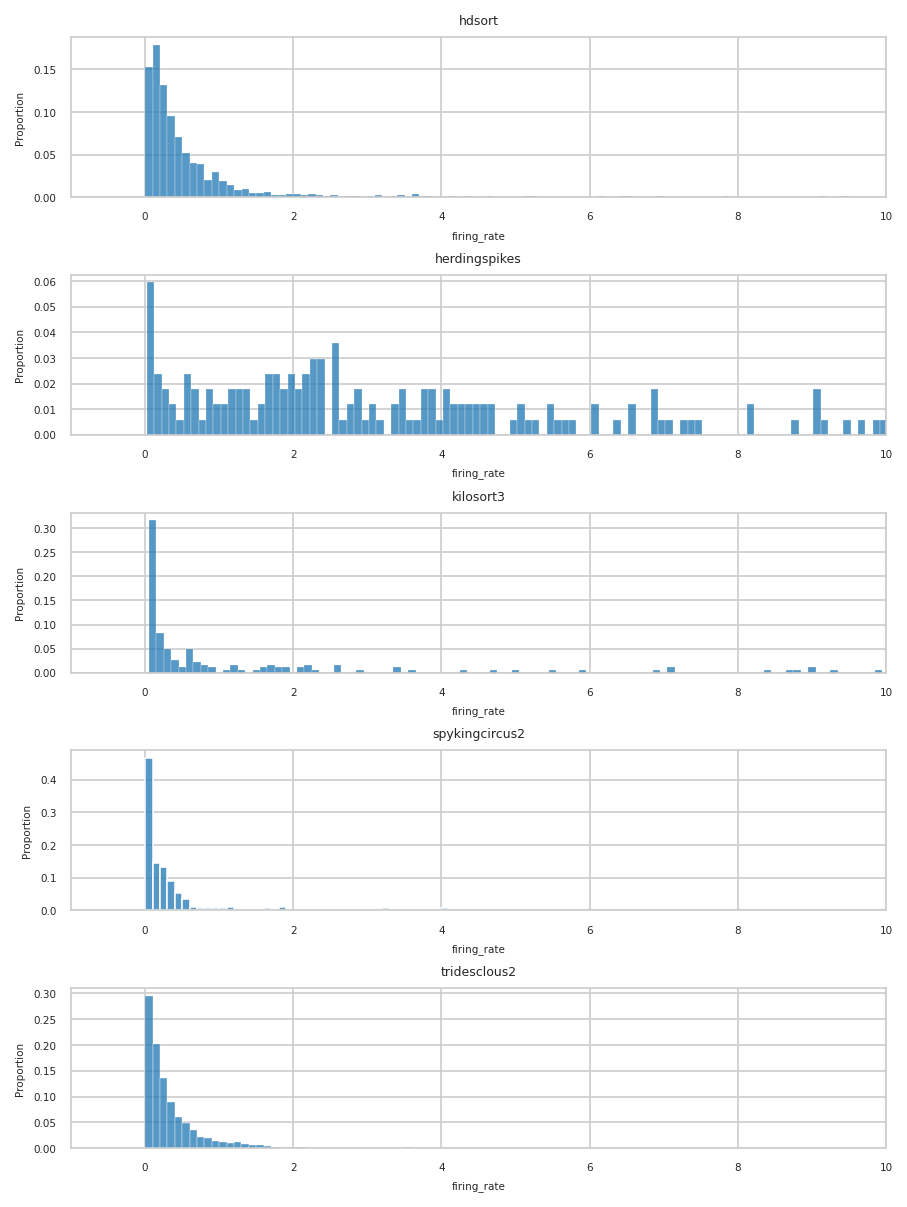

In [15]:
fig, ax = plt.subplots(len(qmetrics),1, figsize = (6,8))
for i, (sorter,qm) in enumerate(qmetrics.items()):
    sns.histplot(qm['firing_rate'], binwidth = 0.1, ax = ax[i], stat = 'proportion')
    ax[i].set_title(sorter)
    ax[i].set_xlim([-1,10])
plt.tight_layout()

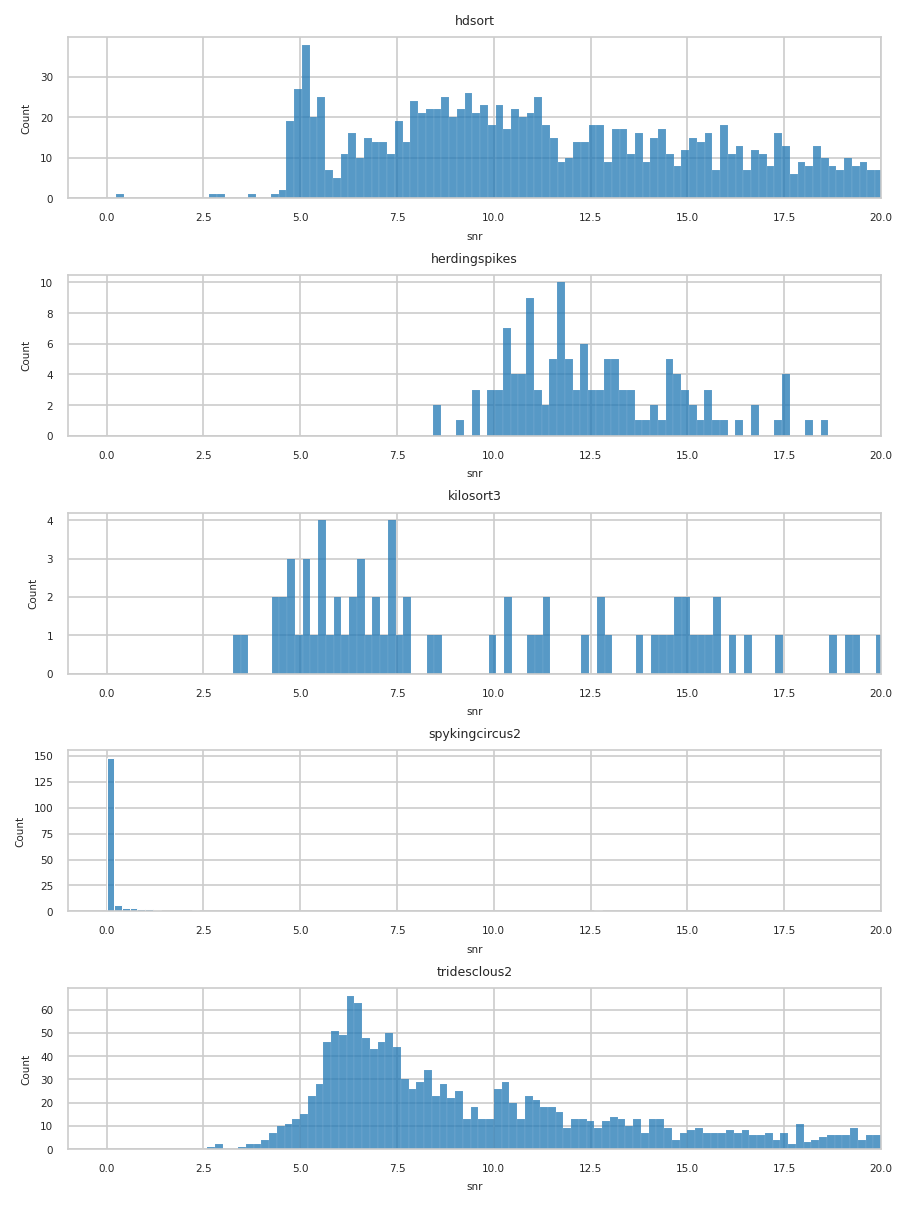

In [16]:
fig, ax = plt.subplots(len(qmetrics),1, figsize = (6,8))
for i, (sorter,qm) in enumerate(qmetrics.items()):
    sns.histplot(qm['snr'], binwidth = 0.2, ax = ax[i], stat = 'count')
    ax[i].set_title(sorter)
    ax[i].set_xlim([-1,20])
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(len(qmetrics),1, figsize = (6,8))
for i, (sorter,qm) in enumerate(qmetrics.items()):
    sns.histplot(qm['num_spikes'], binwidth = 0.2, ax = ax[i], stat = 'count')
    ax[i].set_title(sorter)
    ax[i].set_xlim([-1,20])
plt.tight_layout()

In [18]:
qmetrics['hdsort']

,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_rate,isi_violations_count,amplitude_cutoff,Layer
1001,7384,3.677474,1.00,5.233359,0.871557,0.035360,71,0.000274,5B
1002,231,0.115046,0.82,18.557919,0.000000,0.000000,0,0.001120,5B
1003,149,0.074207,0.59,12.606363,0.000000,0.000000,0,0.001737,5B
2001,13339,6.643259,1.00,5.185978,0.639474,0.084666,170,0.000320,5B
2002,2104,1.047861,0.99,9.708286,1.209538,0.003984,8,0.000123,5B
...,...,...,...,...,...,...,...,...,...
128008,870,0.433289,1.00,4.906609,2.652794,0.001494,3,0.000297,2/3
128009,185,0.092136,0.71,15.339039,0.000000,0.000000,0,0.232175,2/3
128010,286,0.142437,0.96,6.878516,0.000000,0.000000,0,0.000905,2/3
128011,185,0.092136,0.80,15.222761,0.000000,0.000000,0,0.010749,2/3


/nvme/imbeni/1001177/ipykernel_77172/631523478.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pack_mean = pack_fr.groupby('Layer').mean().reset_index()


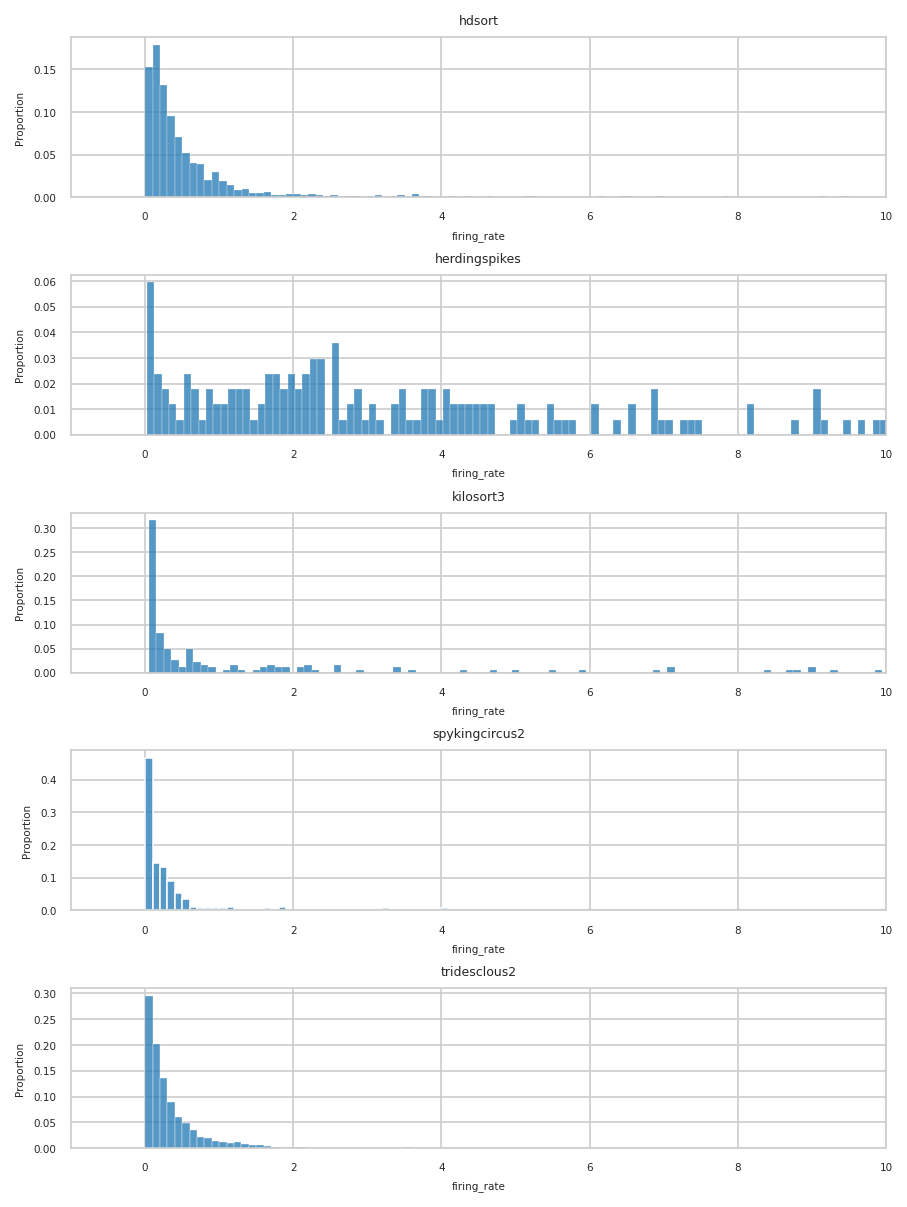

In [19]:

fig, ax = plt.subplots(len(qmetrics),1, figsize = (6,8))
for i, (sorter,qm) in enumerate(qmetrics.items()):
    sns.histplot(qm['firing_rate'], binwidth = 0.1, ax = ax[i], stat = 'proportion')
    ax[i].set_title(sorter)
    ax[i].set_xlim([-1,10])
plt.tight_layout()



pack_mean = pack_fr.groupby('Layer').mean().reset_index()
pack_mean['Sorter'] = np.tile('Mean', len(pack_mean))
pack_fr = pd.concat([pack_fr, pack_mean], axis = 0)

In [20]:
pack_fr

,Sorter,Layer,FR,Units,Spikes
0,hdsort,2/3,1.568299,169.0,532179.0
1,hdsort,4,1.285387,584.0,1507262.0
2,hdsort,5A,1.546795,562.0,1745465.0
3,hdsort,5B,1.423354,360.0,1028863.0
4,herdingspikes,2/3,1.977808,25.0,99281.0
5,herdingspikes,4,4.057805,36.0,293316.0
6,herdingspikes,5A,6.054955,51.0,620045.0
7,herdingspikes,5B,2.366785,56.0,266127.0
8,kilosort3,2/3,3.601204,14.0,101232.0
9,kilosort3,4,7.768628,35.0,545952.0


/nvme/imbeni/1001177/ipykernel_77172/1048687609.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.scatterplot(data = pack_fr.groupby('Sorter').sum(), x = 'Spikes', y = 'Units', hue = 'Sorter')


(0.0, 1800.0)

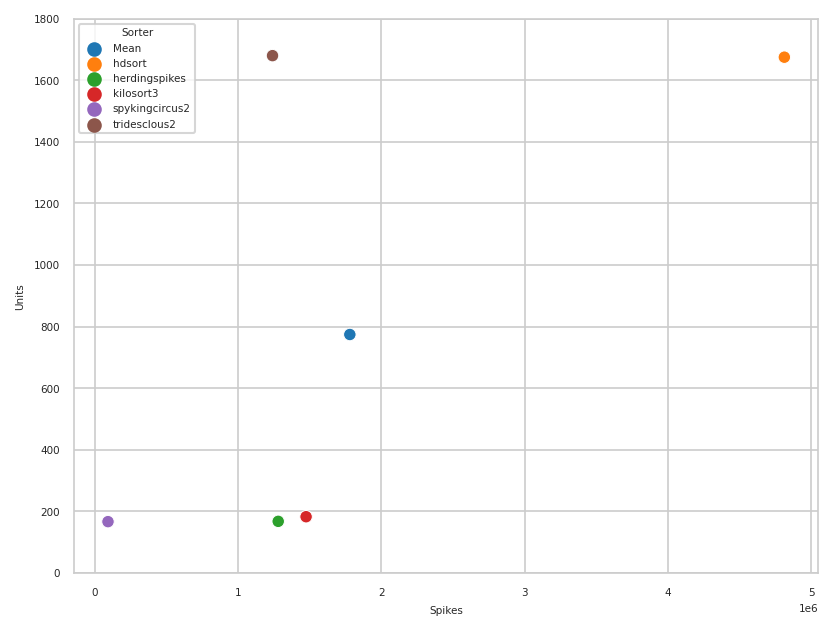

In [21]:
sns.scatterplot(data = pack_fr.groupby('Sorter').sum(), x = 'Spikes', y = 'Units', hue = 'Sorter')
plt.ylim([0,1800])

In [22]:
mean_fr = pd.concat([pack_fr.groupby('Sorter').mean()['FR'] , pack_fr.groupby('Sorter').sum()['Units']], axis = 1)

/nvme/imbeni/1001177/ipykernel_77172/2385311823.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_fr = pd.concat([pack_fr.groupby('Sorter').mean()['FR'] , pack_fr.groupby('Sorter').sum()['Units']], axis = 1)
/nvme/imbeni/1001177/ipykernel_77172/2385311823.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_fr = pd.concat([pack_fr.groupby('Sorter').mean()['FR'] , pack_fr.groupby('Sorter').sum()['Units']], axis = 1)


(0.0, 1800.0)

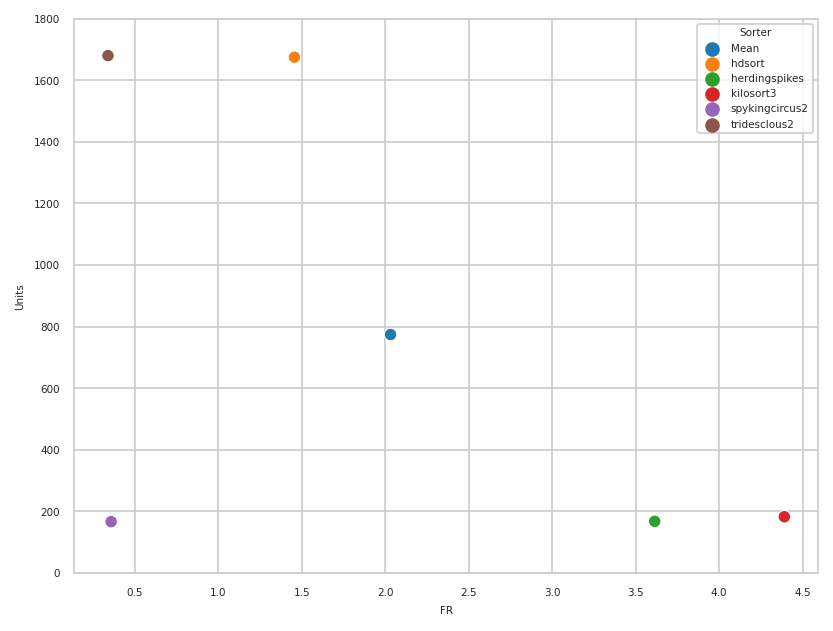

In [23]:
sns.scatterplot(mean_fr, x = 'FR', y = 'Units', hue = 'Sorter')
plt.ylim([0,1800])

In [24]:
pack_fr.loc[pack_fr['Sorter'] == 'Mean']

,Sorter,Layer,FR,Units,Spikes
0,Mean,2/3,1.520301,104.2,175117.4
1,Mean,4,2.778419,222.0,542059.0
2,Mean,5A,2.443147,267.8,672286.6
3,Mean,5B,1.384463,180.6,389498.0


<AxesSubplot: xlabel='Layer', ylabel='FR'>

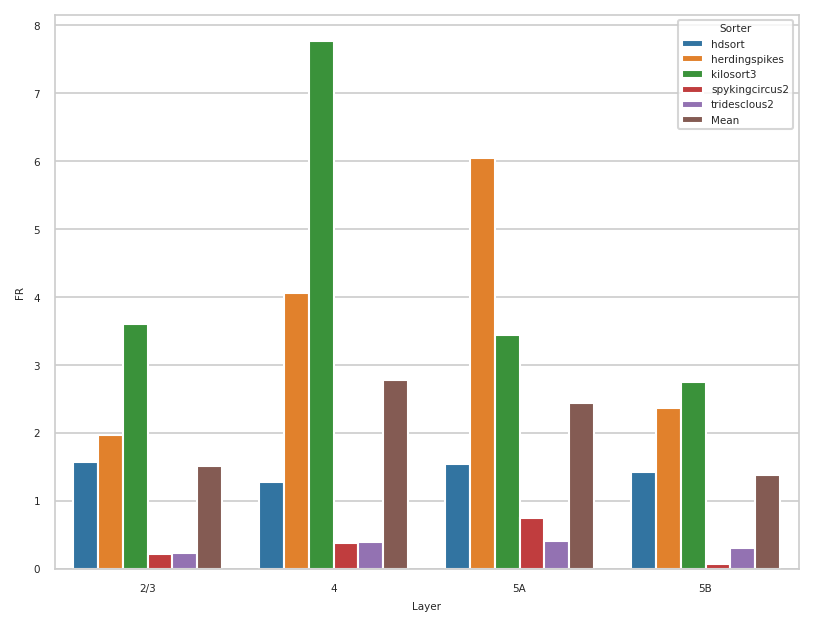

In [25]:
sns.barplot(data = pack_fr, x = 'Layer', y = 'FR', hue = 'Sorter')

<AxesSubplot: xlabel='Layer', ylabel='Units'>

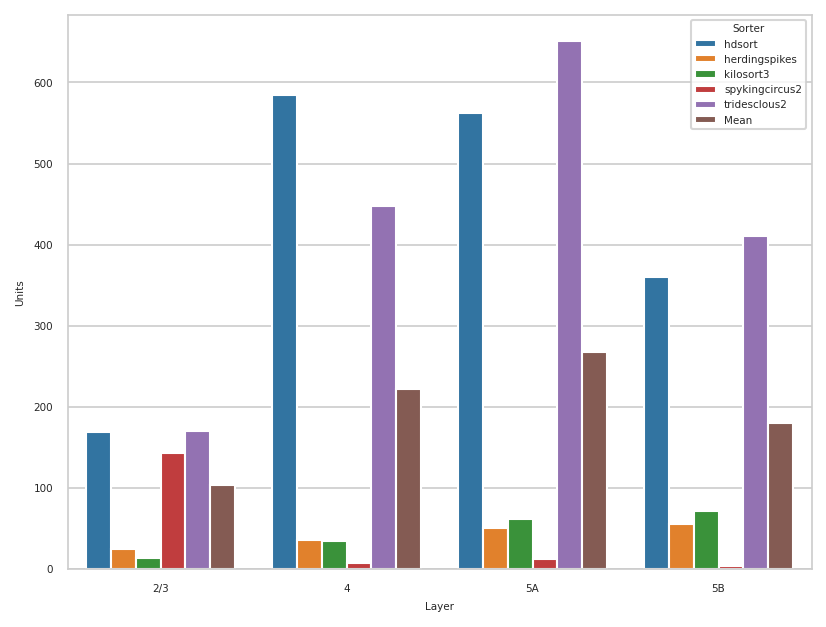

In [26]:
sns.barplot(data = pack_fr, x = 'Layer', y = 'Units', hue = 'Sorter')

<AxesSubplot: xlabel='Layer', ylabel='Spikes'>

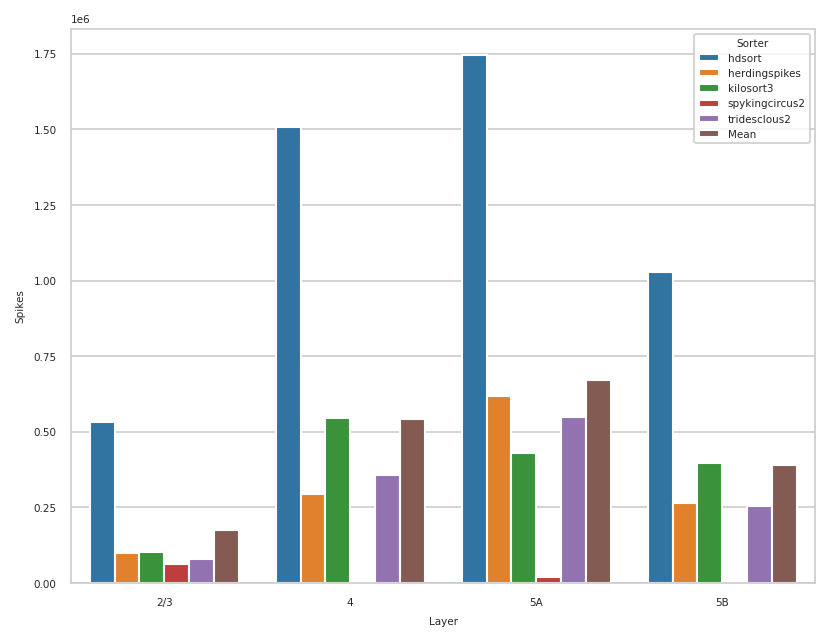

In [27]:
sns.barplot(data = pack_fr, x = 'Layer', y = 'Spikes', hue = 'Sorter')

In [ ]:
sns.scatterplot(data = pack_fr, x = 'FR', y = 'Units', hue = 'Sorter', style = 'Layer')

# Comparison

In [38]:
we_consensus_folder = out + '_consensus' + '_wfs'

In [28]:
sortings, sorters_to_compare = load_sortings_from_sorters(out,sorters)

Loaded hdsort with units = 1675
Loaded herdingspikes with units = 168
Loaded kilosort3 with units = 183
Loaded spykingcircus2 with units = 167
Loaded tridesclous2 with units = 1680


In [ ]:
# Long processing operations


mcmp = sc.compare_multiple_sorters(
    sorting_list=sortings,
    name_list=sorters_to_compare,
    verbose=True,
)

mcmp.save_to_folder(out + '_comparison')
agreement_sorting = mcmp.get_agreement_sorting(minimum_agreement_count=2)
agreement_sorting = agreement_sorting.save(folder= out + '_agreement_spikes')

In [39]:
we_consensus = si.extract_waveforms(rec, agreement_sorting, we_consensus_folder,
                          load_if_exists=False, overwrite=True, verbose = True,
                          ms_before=2, ms_after=2., max_spikes_per_unit=None, n_jobs = 20)
print(we_consensus)

Setting 'return_scaled' to False
extract waveforms memmap with n_jobs = 1 and chunk_size = None
WaveformExtractor: 128 channels - 70 units - 1 segments
  before:40 after:40 n_per_units:None


<class 'networkx.utils.decorators.argmap'> compilation 5:5: DeprecationWarning: read_gpickle is deprecated and will be removed in 3.0.Use ``pickle.load(path)``


AgreementSortingExtractor: 70 units - 1 segments - 20.0kHz


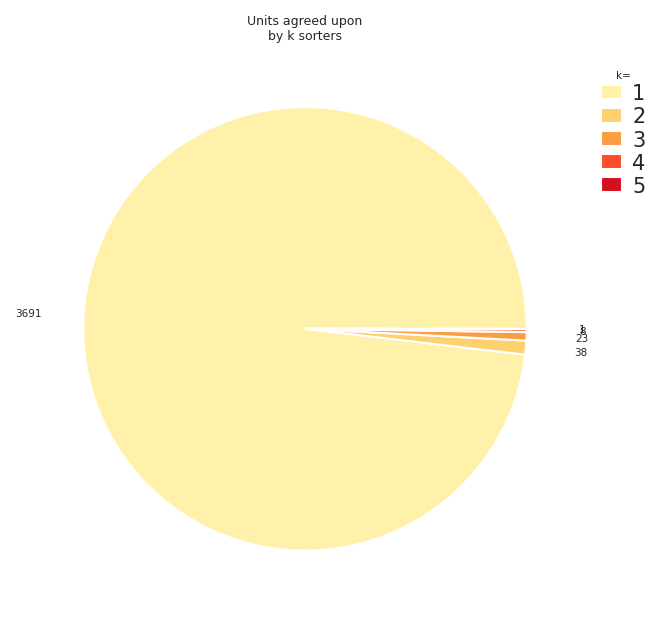

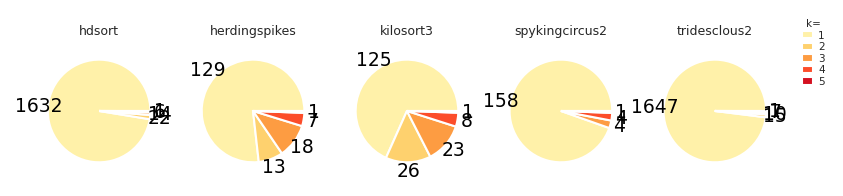

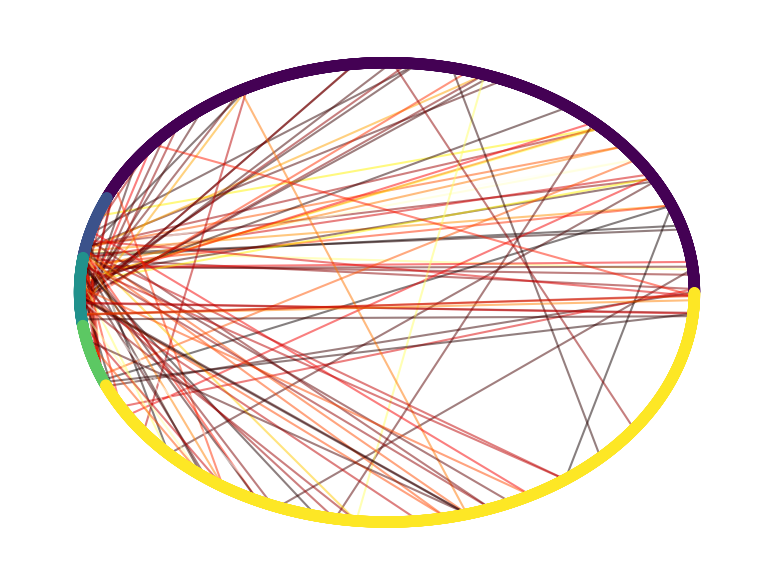

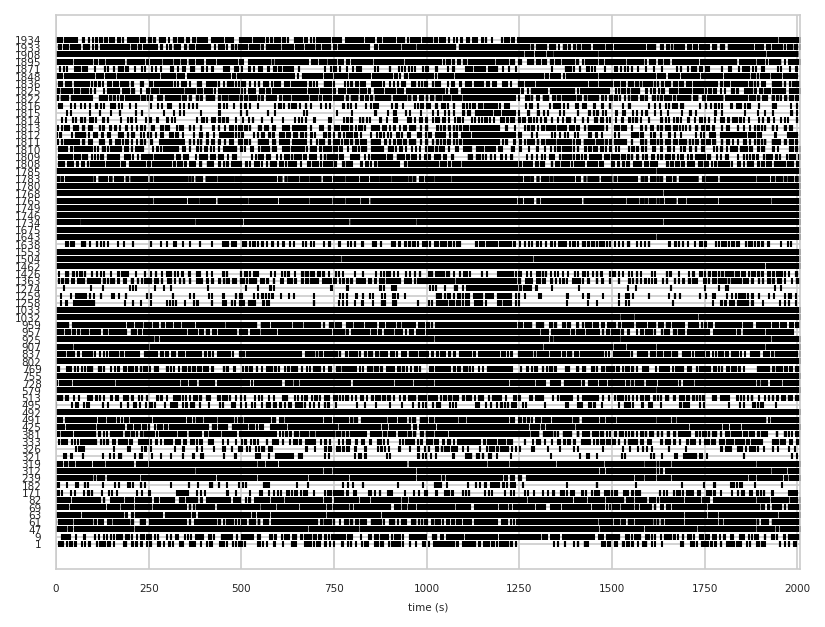

In [29]:
#Compare multiple sorters

mcmp = MultiSortingComparison.load_from_folder(out + '_comparison')


w = sw.plot_multicomp_agreement(mcmp)
w = sw.plot_multicomp_agreement_by_sorter(mcmp)
sw.plot_multicomp_graph(mcmp, draw_labels=False)
agreement_sorting = si.load_extractor( out + '_agreement_spikes')
print(agreement_sorting)
sw.plot_rasters(agreement_sorting)

In [111]:

we_consensus = WaveformExtractor.load_from_folder(we_consensus_folder)
pc = spost.compute_principal_components(we_consensus, load_if_exists=True,
                                     n_components=3, mode='by_channel_local')
print(pc)

WaveformPrincipalComponent: 128 channels - 1 segments
  mode:by_channel_local n_components:3


In [184]:
we = we_consensus
qm = sqm.compute_quality_metrics(we_consensus, n_jobs = 20)
qm,rates_per_layer = firingrates_from_sorting(agreement_sorting,we_consensus,qm,contact_layers)

In [185]:
qm

,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_rate,isi_violations_count,amplitude_cutoff,isolation_distance,l_ratio,d_prime,Layer
1,332,0.165347,0.91,16.979858,6.072180,0.000498,1,0.000779,3.579202e+14,NaN,7.387144,5B
9,544,0.270930,0.98,15.233834,4.523275,0.000996,2,0.016888,4.376508e+02,0.185833,5.632316,5B
47,3121,1.554360,1.00,27.157400,0.618409,0.004482,9,0.000083,1.542335e+02,18.424244,6.616771,5A
61,1498,0.746053,1.00,55.275326,2.087831,0.003486,7,0.002319,1.502232e+02,40.287318,5.170714,5A
63,1585,0.789382,1.00,15.804845,0.799252,0.001494,3,0.000163,1.484323e+02,32.693544,2.810522,5A
...,...,...,...,...,...,...,...,...,...,...,...,...
1871,224,0.111559,0.84,13.980682,0.000000,0.000000,0,0.001155,1.805050e+14,NaN,5.847013,5B
1895,1428,0.711191,1.00,30.743622,0.328220,0.000498,1,0.004269,1.558949e+02,52.817985,6.404189,5B
1908,3690,1.837741,1.00,36.969654,1.867892,0.018925,38,0.009760,1.356464e+02,28.425369,5.108093,5A
1933,1276,0.635490,1.00,39.697540,0.000000,0.000000,0,0.002241,1.809036e+02,45.377012,5.582295,5B


In [186]:
qm.dropna(inplace= True)

In [189]:
def plot_qm(qm):
    
    plot_params = { 'num_spikes' :          {'xlim' : 0},
                    'firing_rate':          {'xlim' : 7},
                    'presence_ratio':       {'xlim' : 1},
                    'snr':                  {'xlim' : 100},
                    'isi_violations_ratio': {'xlim' : 0},
                    'amplitude_cutoff':     {'xlim' : 0.5},
                    'isolation_distance' :  {'xlim' : 0},
                    'l_ratio' :             {'xlim' : 1},
                    'd_prime' :             {'xlim' : 10},
                    'Layer' :               {'xlim' : 0}
                  }
    fig, ax = plt.subplots(len(qm.columns)-4,1, figsize = (6,8))
    i = 0
    for col in qm:
        if col == 'isi_violations_rate' or col == 'isi_violations_count' or col == 'num_spikes' or col == 'Layer':
            continue
        print(col)
        
        data = qm[col]
        xlim = plot_params[col]['xlim'] 
        #params[col]['binwidth'] = binwidth
        
        if xlim != 0:
            ax[i].set_xlim(right = xlim)
            binwidth = xlim/50
        else:
            binwidth = np.ptp(data)/30
            
        sns.histplot(data, binwidth = binwidth , ax = ax[i], stat = 'proportion')
        #ax[i].set_title(col)
        i +=1

    plt.tight_layout()
    plt.show()

firing_rate
presence_ratio
snr
isi_violations_ratio
amplitude_cutoff
isolation_distance
l_ratio
d_prime


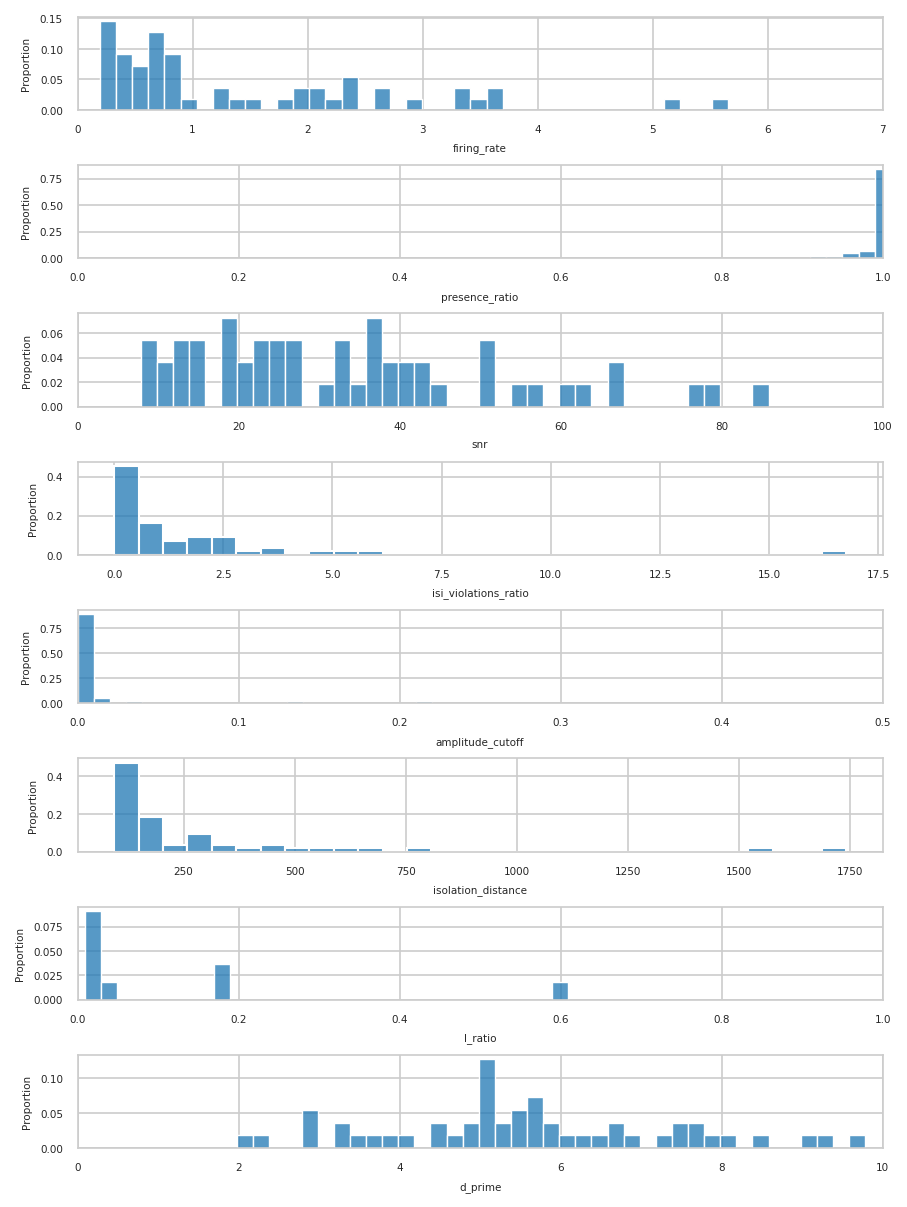

In [190]:
plot_qm(qm)

In [179]:
for i in template_metrics:
    print(i)

peak_to_valley
peak_trough_ratio
half_width
repolarization_slope
recovery_slope


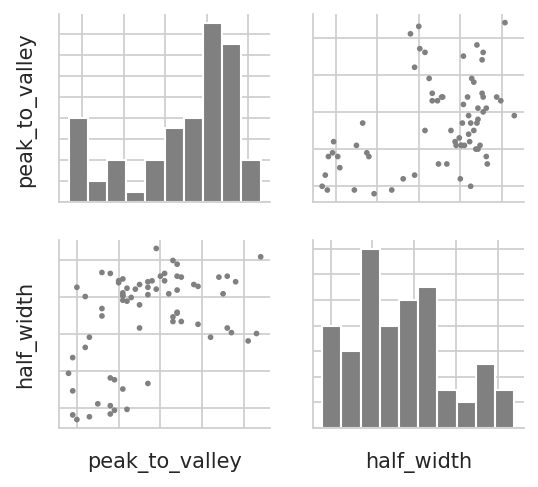

In [79]:
template_metrics = spost.compute_template_metrics(we)
sw.plot_template_metrics(we, include_metrics=["peak_to_valley", "half_width"])
plt.show()

<AxesSubplot: xlabel='peak_to_valley', ylabel='peak_trough_ratio'>

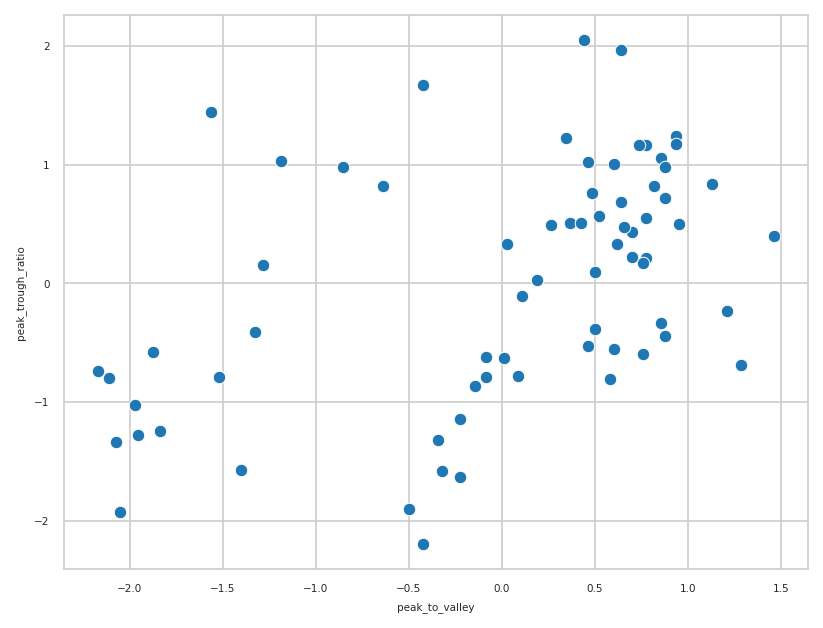

In [73]:
sns.scatterplot(template_metrics, x = "peak_to_valley", y = 'peak_trough_ratio')

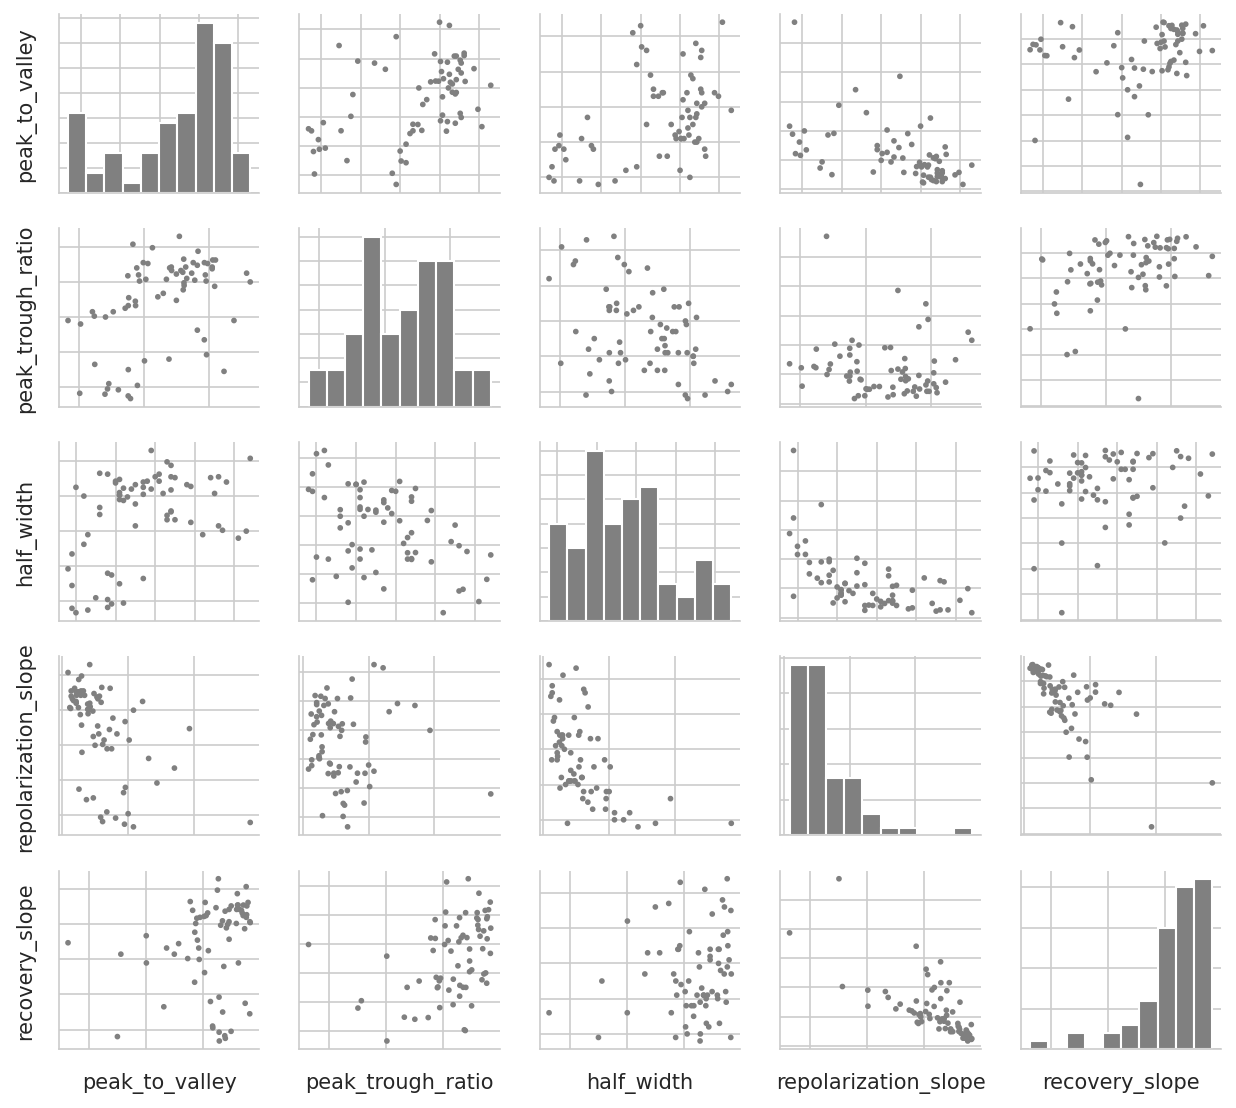

In [80]:
sw.plot_template_metrics(we, include_metrics=["peak_to_valley", "half_width", "peak_trough_ratio", "repolarization_slope", "recovery_slope"])

In [103]:
def normalize(df):
    df = df.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
    return df

In [ ]:
template_metrics = normalize_df(template_metrics)

In [88]:
pca = PCA(n_components=2)
x = pca.fit_transform(template_metrics[["peak_to_valley", "half_width", "peak_trough_ratio"]])

In [89]:
x

array([[-1.05500743, -0.77313026],
       [-1.38773455,  0.39163954],
       [-0.58151523, -0.51711229],
       [ 0.38380542,  0.71663057],
       [-1.54871973,  0.05432149],
       [ 1.52662955,  2.38137669],
       [-1.4335335 ,  0.51547541],
       [-0.7655723 ,  0.94921454],
       [-0.74933759, -1.87181978],
       [-0.1873807 , -0.90284003],
       [ 1.68389352, -0.58068418],
       [-0.53216253,  1.40475011],
       [-0.73571772,  0.46256302],
       [-1.13280375, -0.09508912],
       [-1.32205996, -0.73946987],
       [-0.09592214, -0.71188397],
       [-0.79709731, -0.08705741],
       [-0.62791803,  2.65880183],
       [ 1.29473686, -0.82346505],
       [-0.94705872,  0.10066427],
       [-1.17014294,  0.47812549],
       [ 1.8153757 , -1.00878786],
       [-0.86848399, -0.16567836],
       [-0.93539791, -0.07964274],
       [-1.29286966, -0.75272292],
       [-0.04918416,  0.5852194 ],
       [-1.32486208,  0.07977588],
       [ 2.25478365, -0.90697948],
       [ 2.85638357,

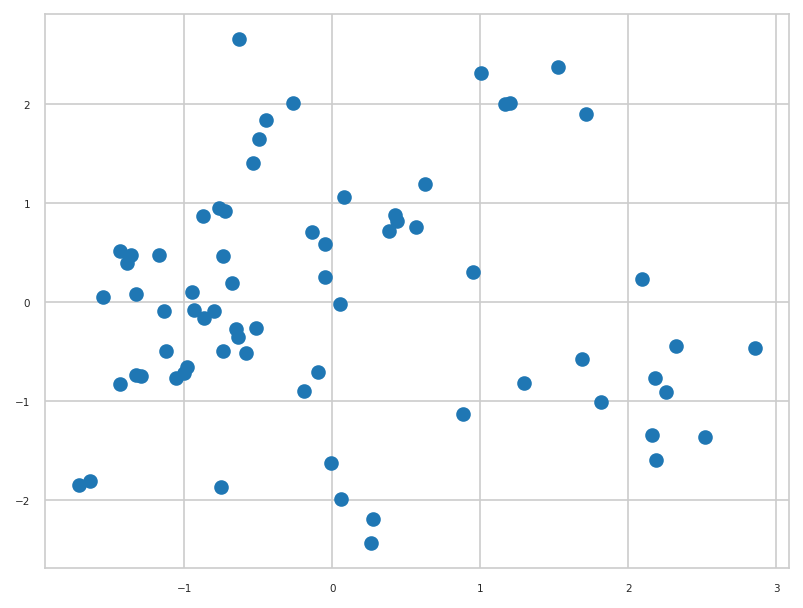

In [90]:
plt.scatter(x[:,0],x[:,1])

In [50]:
sum(pca.explained_variance_ratio_)

0.7788428409957129

In [52]:
pca.components_

array([[-0.48242244, -0.21547547, -0.38083935,  0.59139036, -0.4754553 ],
       [-0.11768684, -0.74034937,  0.60581027, -0.15175804, -0.21907997]])

In [67]:
from sklearn.cluster import KMeans

In [69]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(template_metrics)

kmeans2 = KMeans(n_clusters=2, random_state=0).fit(x)

In [71]:
kmeans.labels_


array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0], dtype=int32)

In [72]:
kmeans2.labels_

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0], dtype=int32)

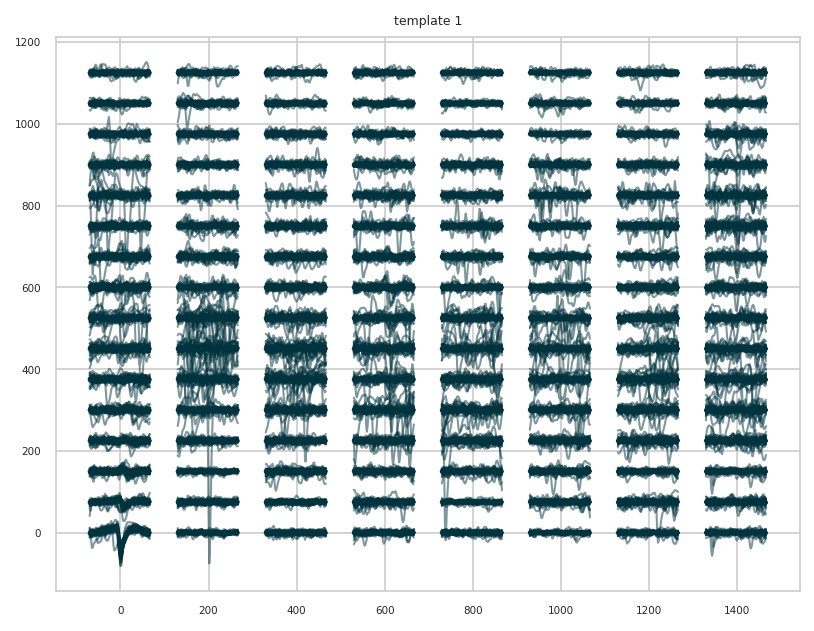

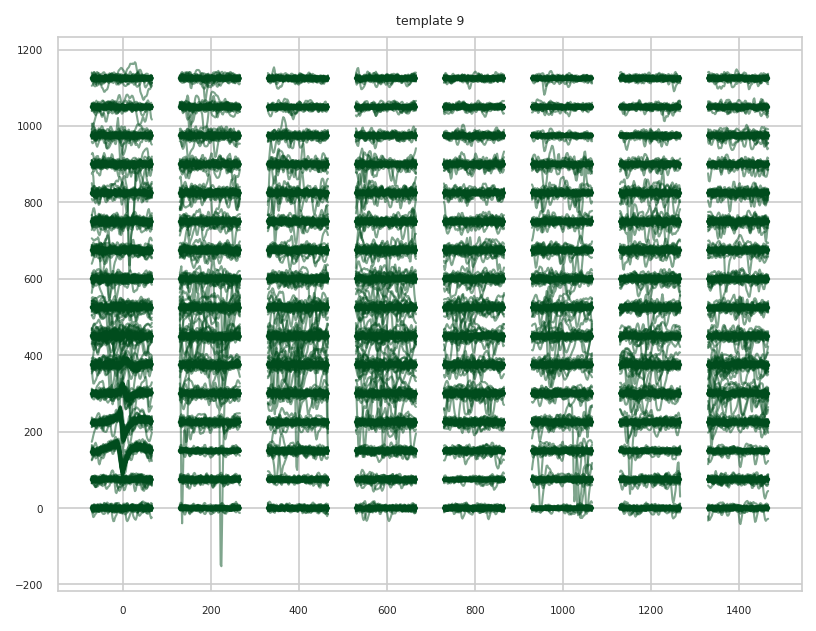

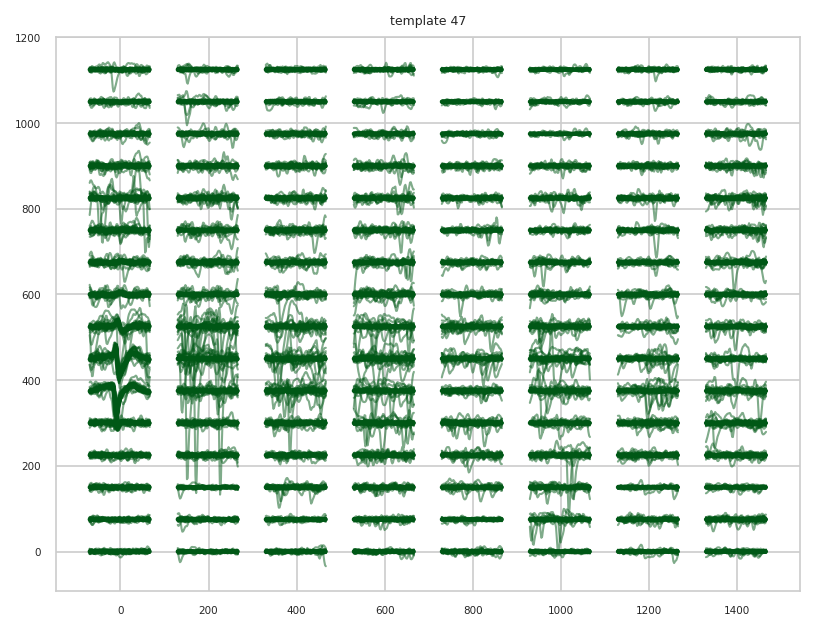

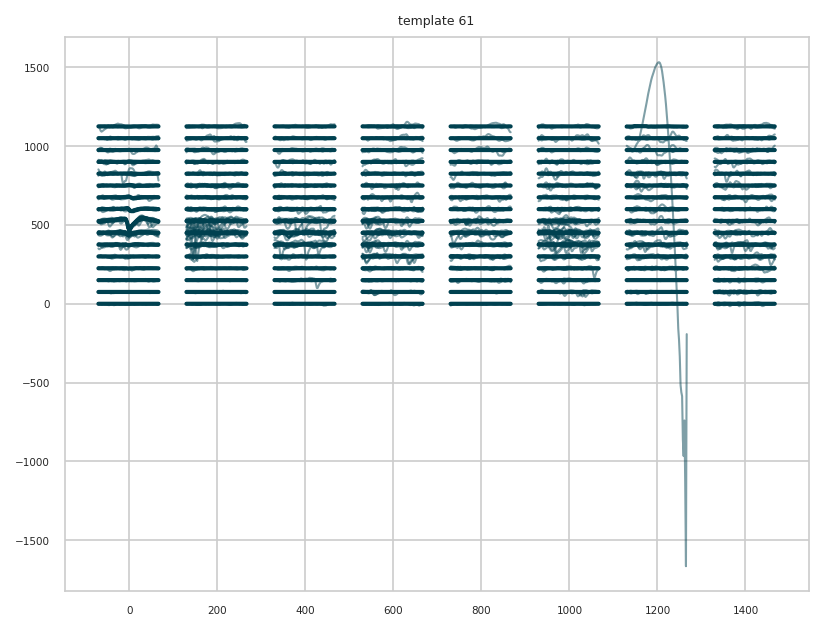

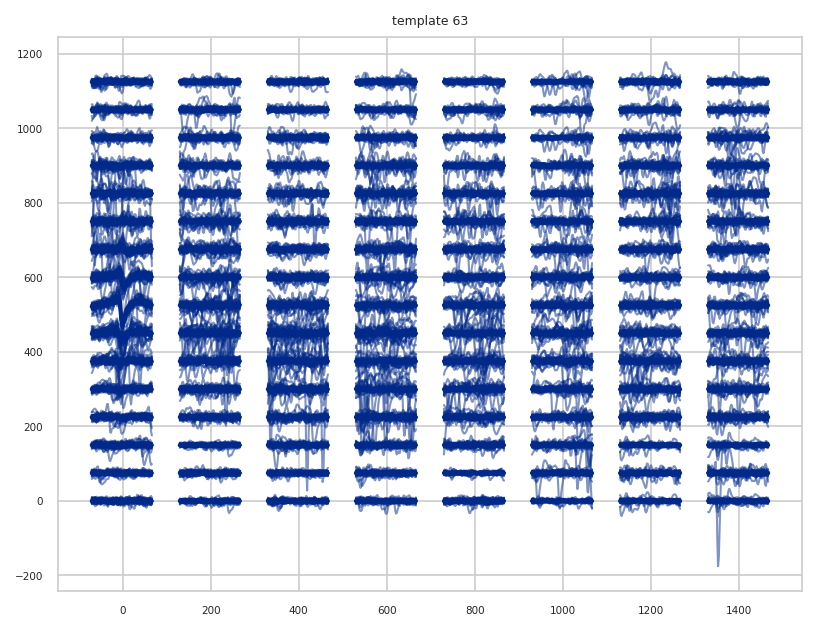

In [64]:
for i in agreement_sorting.get_unit_ids()[:5]:
    sw.plot_unit_waveforms(we_consensus, unit_ids=[i])
    plt.show()

In [60]:
dir(agreement_sorting)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_check_segment_index',
 '_extra_metadata_from_folder',
 '_extra_metadata_to_folder',
 '_features',
 '_get_file_path',
 '_kwargs',
 '_main_annotations',
 '_main_features',
 '_main_ids',
 '_main_properties',
 '_preferred_mp_context',
 '_properties',
 '_recording',
 '_sampling_frequency',
 '_save',
 '_sorting_segments',
 'add_sorting_segment',
 'annotate',
 'check_if_dumpable',
 'clone',
 'copy_metadata',
 'dump',
 'dump_to_json',
 'dump_to_pickle',
 'extra_requirements',
 'extractor_name',
 'frame_slice',
 'from_dict',
 'get_all_spike_trains',
 'get_annotation',
 'get_annotation_keys',
 'get_num_segments',

In [93]:
we_ks3 = WaveformExtractor.load_from_folder(out + 'kilosort3' + '_wfs')

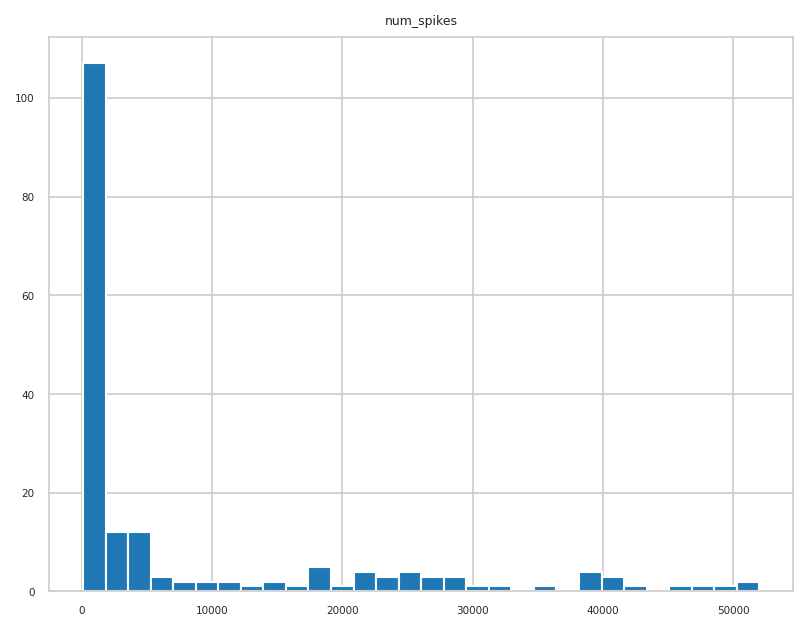

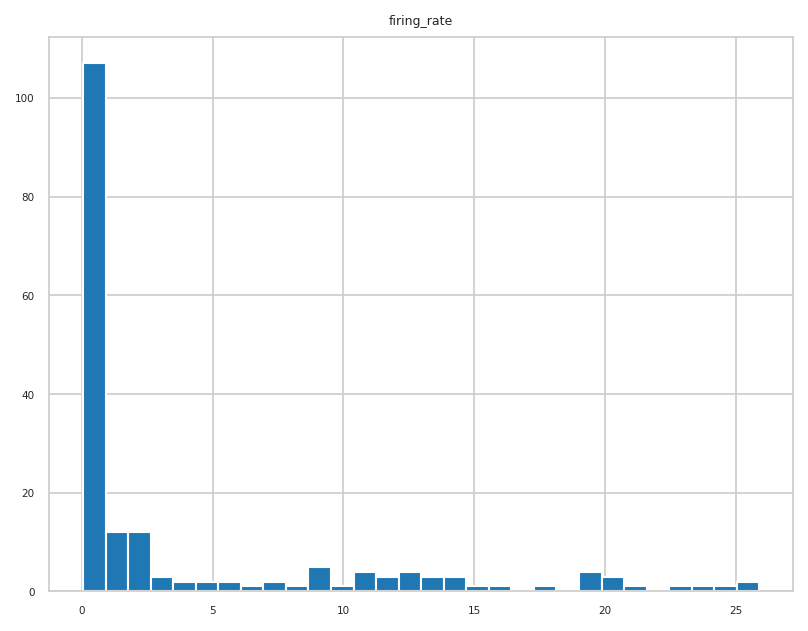

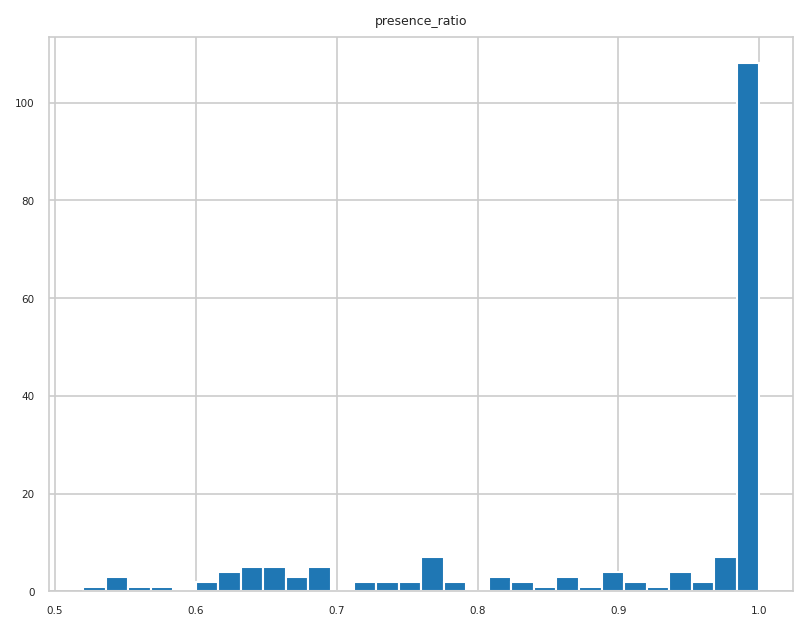

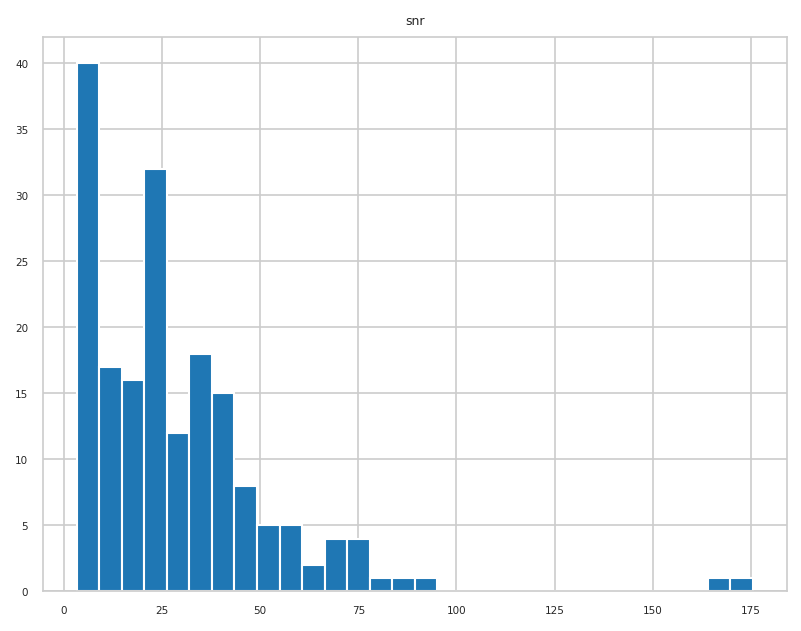

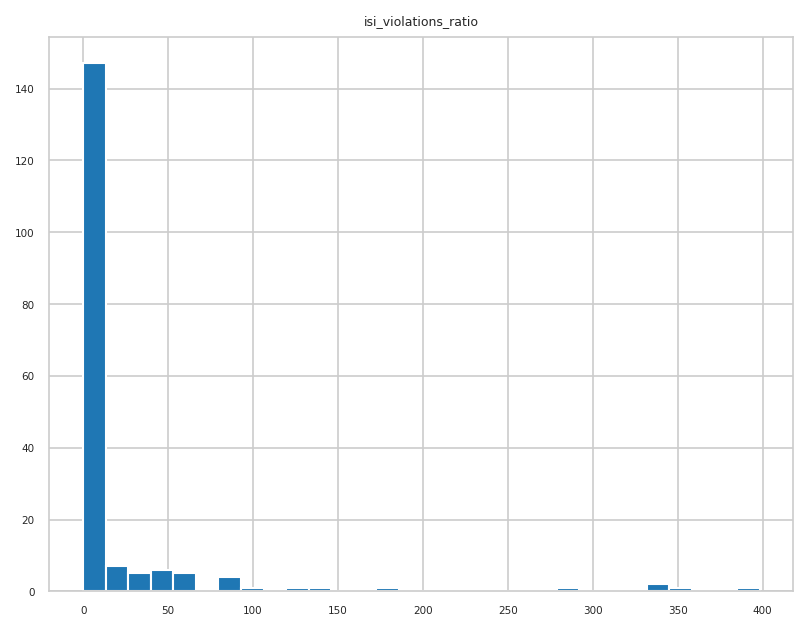

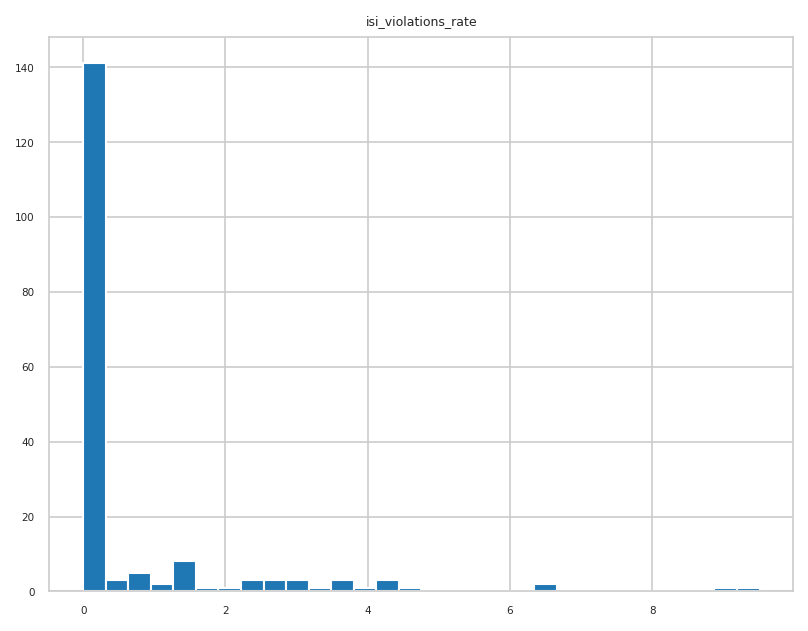

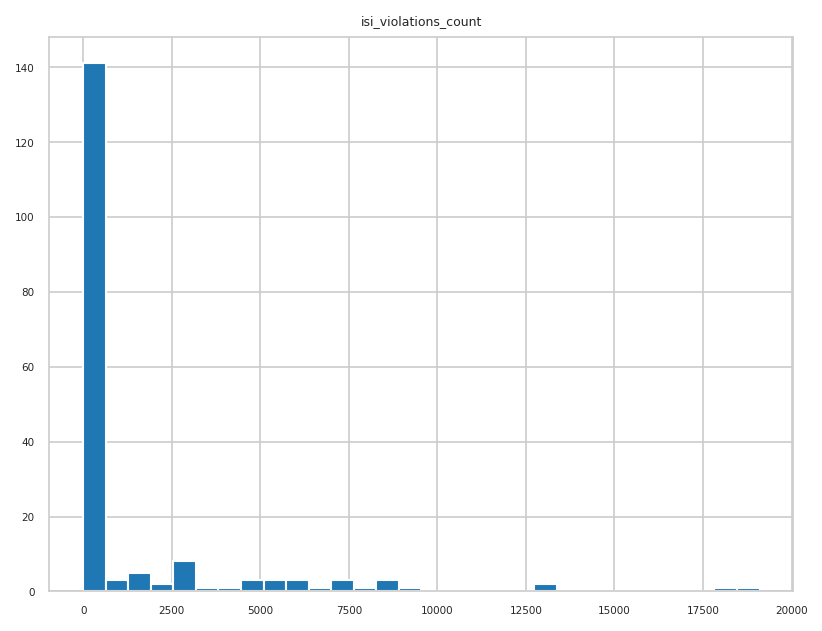

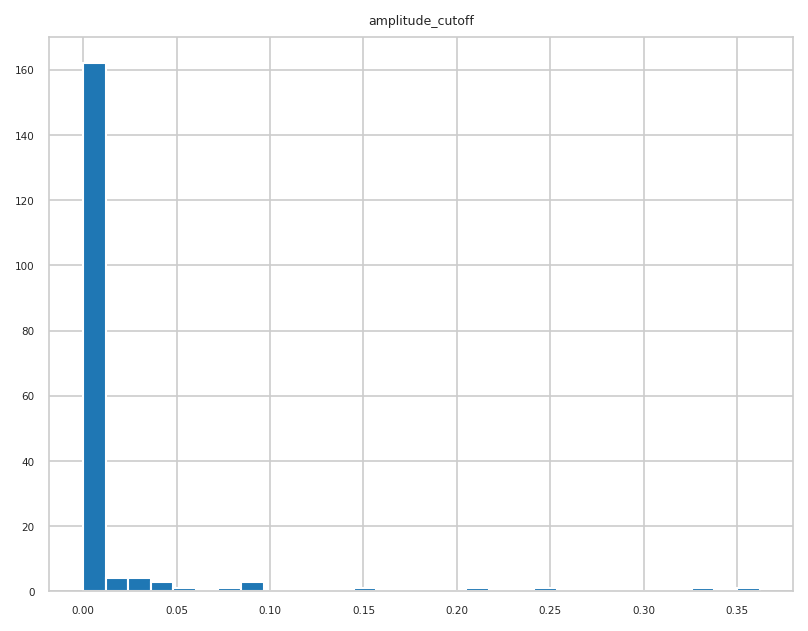

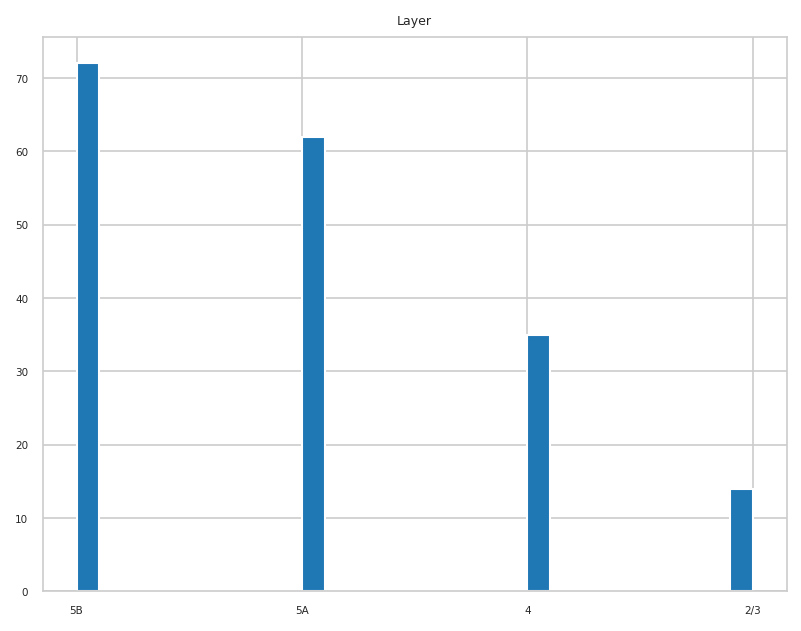

In [91]:
for col in qmetrics['kilosort3'].columns:
    qmetrics['kilosort3'][col].hist( bins = 30)
    plt.title(col)
    plt.show()

In [94]:
template_metrics_ks3 = spost.compute_template_metrics(we_ks3)

/gpfs/bbp.cscs.ch/home/imbeni/spike/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/gpfs/bbp.cscs.ch/home/imbeni/spike/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:195: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/gpfs/bbp.cscs.ch/home/imbeni/spike/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:198: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


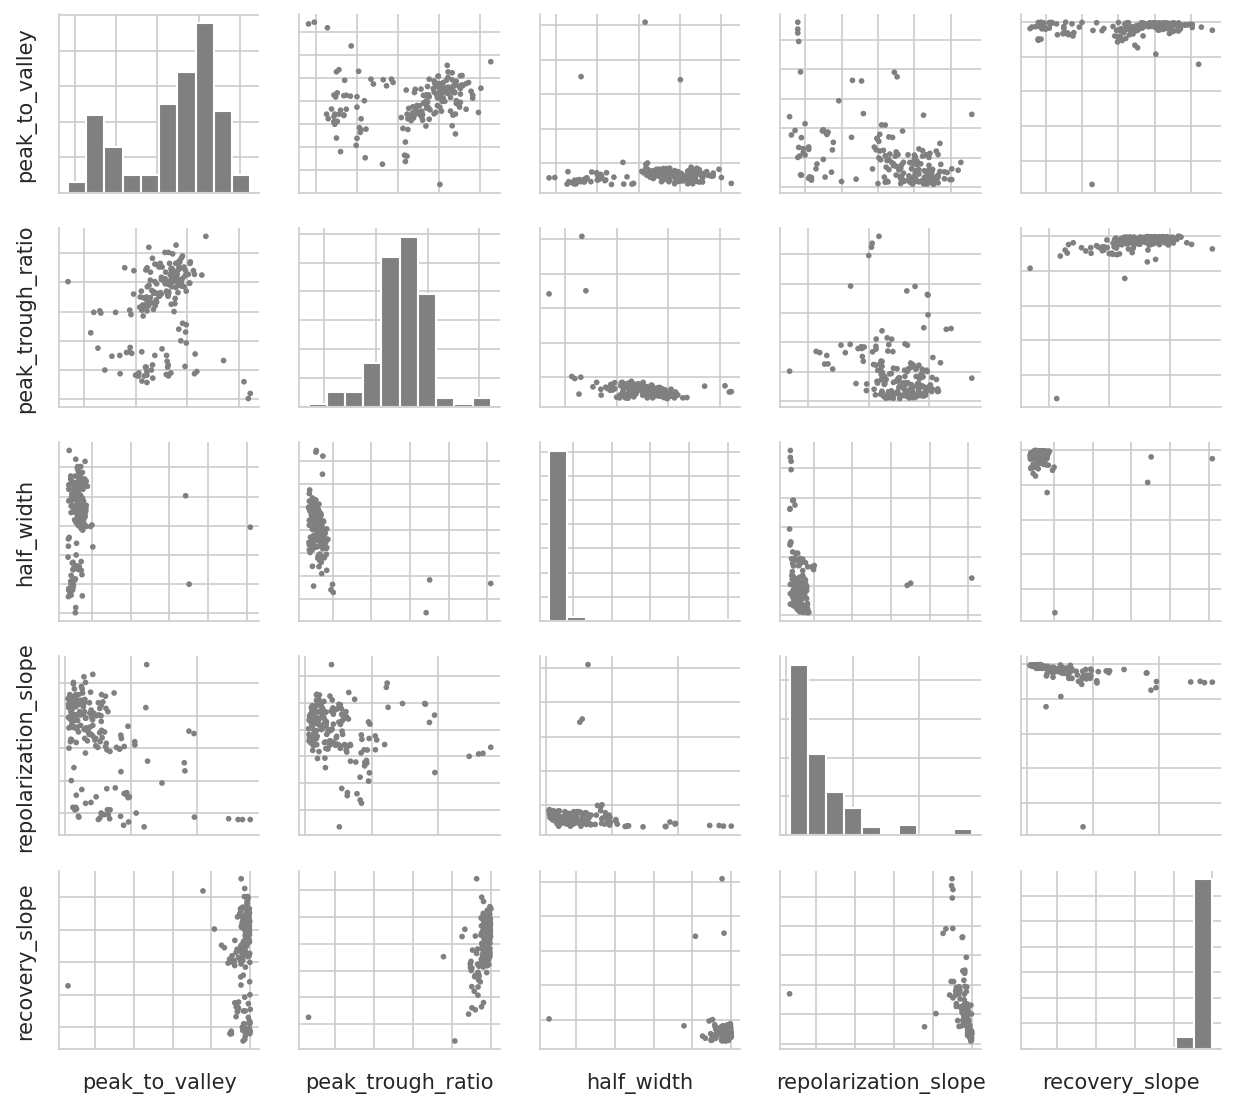

In [96]:
sw.plot_template_metrics(we_ks3, include_metrics=["peak_to_valley", "half_width", "peak_trough_ratio", "repolarization_slope", "recovery_slope"])

In [106]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(template_metrics_ks3[['peak_to_valley', 'peak_trough_ratio']])
labels = kmeans.labels_

<AxesSubplot: xlabel='peak_to_valley', ylabel='peak_trough_ratio'>

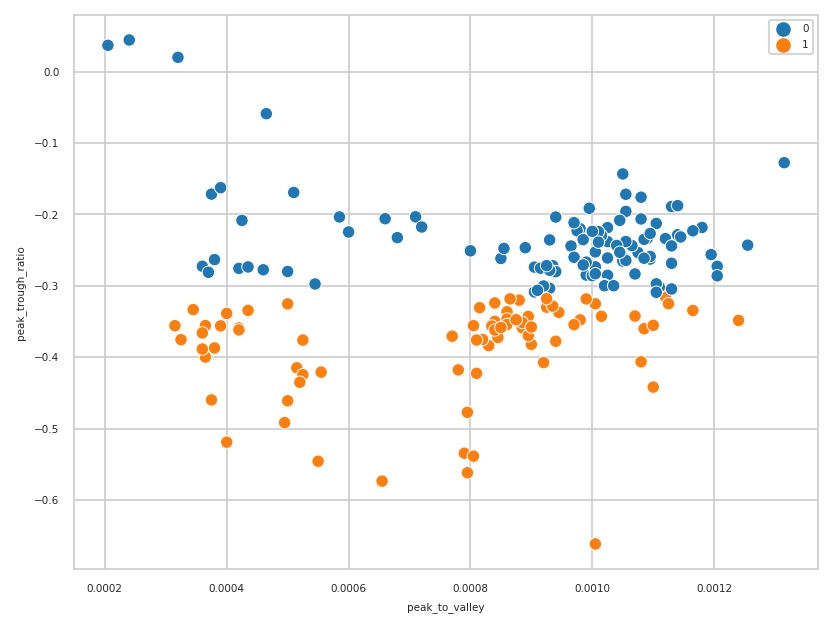

In [107]:
sns.scatterplot(data = template_metrics_ks3, x = 'peak_to_valley', y = 'peak_trough_ratio', hue = labels)

In [ ]:
GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]